In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff

#import dickeyfullertest from stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
#import time series 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from pmdarima.arima  import auto_arima 
from statsmodels.tsa.arima.model  import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings         ##############To eliminate warning popups

warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv("C:\\Users\\keesi\\Re_Beauty_cluster.csv")

In [3]:
df1.dtypes

summary        object
overall         int64
Sentiment       int64
h             float64
reviewerID     object
asin           object
year            int64
month           int64
day             int64
reviewTime     object
Po            float64
cluster         int64
dtype: object

In [4]:
df1["reviewTime"]=pd.to_datetime(df1['reviewTime'])##################Changing the Data type
df1.dtypes

summary               object
overall                int64
Sentiment              int64
h                    float64
reviewerID            object
asin                  object
year                   int64
month                  int64
day                    int64
reviewTime    datetime64[ns]
Po                   float64
cluster                int64
dtype: object

In [5]:
df1=df1.sort_values(by='reviewTime')############Shorting the data
df1.head()

,summary,overall,Sentiment,h,reviewerID,asin,year,month,day,reviewTime,Po,cluster
1692,shampoo husband use late,5,1,44.680851,A281NPSIMI1C2R,B0000535UM,2002,6,16,2002-06-16,-0.3,0
1699,good detangl,5,1,39.130435,A281NPSIMI1C2R,B0000535UN,2002,6,16,2002-06-16,0.7,0
2615,excit,5,1,48.809524,AWIF8AR75LL9L,B000065DK4,2002,11,7,2002-07-11,0.0,0
1730,gentl hand soap,5,1,0.000000,A281NPSIMI1C2R,B0000535UX,2002,6,12,2002-12-06,0.0,4
3036,great clipper need improv tho,4,1,49.488055,AN81JUYW2SL24,B00008BNZ4,2003,10,13,2003-10-13,0.8,0


In [6]:
df=df1.set_index(df1['reviewTime'])#########Setting order date as index
df.drop('reviewTime',axis='columns',inplace=True)
df.head(10)#################################Raw data

,summary,overall,Sentiment,h,reviewerID,asin,year,month,day,Po,cluster
reviewTime,,,,,,,,,,,
2002-06-16,shampoo husband use late,5,1,44.680851,A281NPSIMI1C2R,B0000535UM,2002,6,16,-0.3,0
2002-06-16,good detangl,5,1,39.130435,A281NPSIMI1C2R,B0000535UN,2002,6,16,0.7,0
2002-07-11,excit,5,1,48.809524,AWIF8AR75LL9L,B000065DK4,2002,11,7,0.0,0
2002-12-06,gentl hand soap,5,1,0.000000,A281NPSIMI1C2R,B0000535UX,2002,6,12,0.0,4
2003-10-13,great clipper need improv tho,4,1,49.488055,AN81JUYW2SL24,B00008BNZ4,2003,10,13,0.8,0
2003-11-05,use extra ingredi mixtur,5,1,38.636364,A281NPSIMI1C2R,B000052Y33,2003,5,11,0.0,0
2003-11-05,sensit skin sunblock,5,1,47.826087,A281NPSIMI1C2R,B0000537NH,2003,5,11,0.0,0
2003-11-22,satisfi hair enthusiast,5,1,48.387097,A3RGN75LHYAG8U,B000065DJY,2003,11,22,0.0,0
2003-12-17,work wonder,5,1,49.218750,A2B7BUH8834Y6M,B000052XZP,2003,12,17,0.0,0


In [7]:
data=df[['overall','Sentiment','h']]
data

,overall,Sentiment,h
reviewTime,,,
2002-06-16,5,1,44.680851
2002-06-16,5,1,39.130435
2002-07-11,5,1,48.809524
2002-12-06,5,1,0.000000
2003-10-13,4,1,49.488055
...,...,...,...
2014-12-07,5,1,0.000000
2014-12-07,5,1,50.000000
2014-12-07,4,1,0.000000


In [8]:
data.Sentiment.value_counts()

1    164590
0     23559
Name: Sentiment, dtype: int64

In [9]:
#data['Sentiment'].replace('Positive',1,inplace=True)
#data['Sentiment'].replace('Negative',0,inplace=True)
#data['Sentiment'].replace('Neutral',0,inplace=True)
data.Sentiment.value_counts()

1    164590
0     23559
Name: Sentiment, dtype: int64

In [9]:
#Plots

In [10]:
df2=data.resample('Y').mean().round(2)########Sampling the data based on years 
df2.head(10)

,overall,Sentiment,h
reviewTime,,,
2002-12-31,5.00,1.00,33.16
2003-12-31,4.78,1.00,48.17
2004-12-31,4.58,0.98,45.39
2005-12-31,4.56,0.92,40.17
2006-12-31,4.36,0.89,41.48
2007-12-31,4.23,0.86,38.92
2008-12-31,4.17,0.88,31.34
2009-12-31,4.19,0.88,29.29
2010-12-31,4.14,0.85,29.11


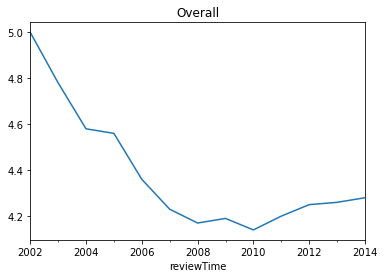

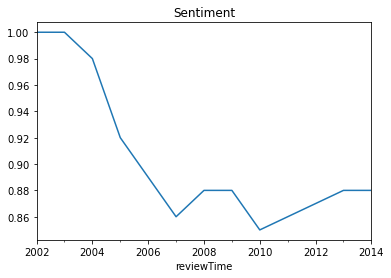

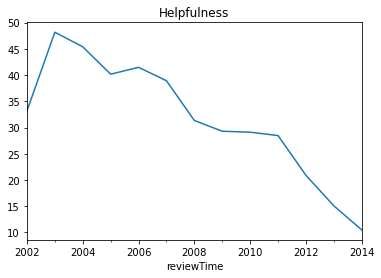

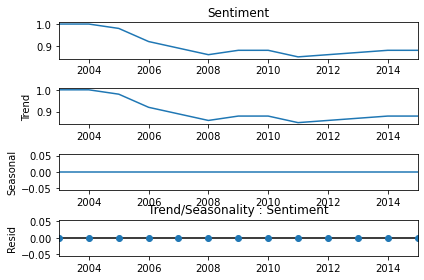

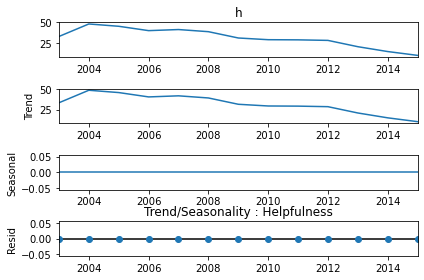

In [11]:
df2['overall'].plot(figsize=(6,4))
plt.title("Overall")
plt.show()
df2['Sentiment'].plot(figsize=(6,4))
plt.title("Sentiment")
plt.show()
df2['h'].plot(figsize=(6,4))
plt.title("Helpfulness")
plt.show()
seasonal_decompose(df2['Sentiment']).plot();
plt.title("Trend/Seasonality : Sentiment")
plt.show()
seasonal_decompose(df2['h']).plot();
plt.title("Trend/Seasonality : Helpfulness")
plt.show()

In [12]:
#Down ward trend is seen in the data

In [12]:
df3=data.resample('M').mean().round(2)########Sampling the data based on Months
df3.dropna()

,overall,Sentiment,h
reviewTime,,,
2002-06-30,5.00,1.00,41.91
2002-07-31,5.00,1.00,48.81
2002-12-31,5.00,1.00,0.00
2003-10-31,4.00,1.00,49.49
2003-11-30,5.00,1.00,44.95
...,...,...,...
2014-08-31,4.30,0.88,10.49
2014-09-30,4.36,0.89,9.80
2014-10-31,4.25,0.87,9.55


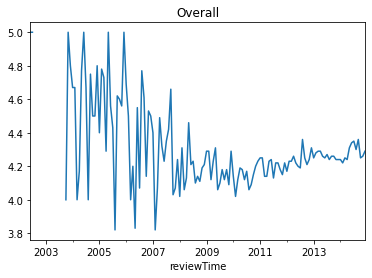

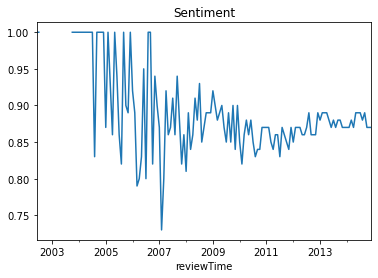

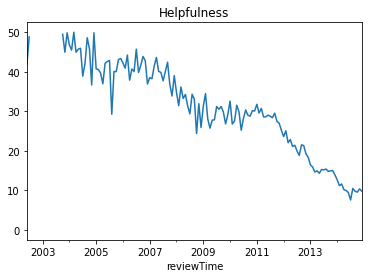

In [13]:
df3['overall'].plot(figsize=(6,4))
plt.title("Overall")
plt.show()
df3['Sentiment'].plot(figsize=(6,4))
plt.title("Sentiment")
plt.show()
df3['h'].plot(figsize=(6,4))
plt.title("Helpfulness")
plt.show()

In [14]:
df3.isnull().sum()

overall      13
Sentiment    13
h            13
dtype: int64

In [15]:
df3['overall']=df3['overall'].fillna(df3['overall'].median())
df3['Sentiment']=df3['Sentiment'].fillna(df3['Sentiment'].median())
df3['h']=df3['h'].fillna(df3['h'].median())

In [16]:
df3.isnull().sum()

overall      0
Sentiment    0
h            0
dtype: int64

Trend is found in the data . So smoothing shold be done.

# Moving average:
    

In [17]:
dfs=df3['Sentiment']
#Moving average is done to find posive lages.
#Window values :random.
moving_avg17=dfs.rolling(window=17).mean()
moving_avg7=dfs.rolling(window=7).mean()
moving_avg15=dfs.rolling(window=15).mean()
moving_avg5=dfs.rolling(window=5).mean()
moving_avg20=dfs.rolling(window=20).mean()
moving_avg10=dfs.rolling(window=10).mean()

In [18]:
df_ma=pd.DataFrame({'actual':dfs,'Moving_avg17':moving_avg17,'Moving_avg7':moving_avg7,'Moving_avg15':moving_avg15,'Moving_avg5':moving_avg5,'Moving_avg20':moving_avg20,'Moving_avg10':moving_avg10})
df_ma.head(6)

,actual,Moving_avg17,Moving_avg7,Moving_avg15,Moving_avg5,Moving_avg20,Moving_avg10
reviewTime,,,,,,,
2002-06-30,1.000,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-31,1.000,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-31,0.875,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,0.875,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-31,0.875,NaN,NaN,NaN,0.925,NaN,NaN
2002-11-30,0.875,NaN,NaN,NaN,0.900,NaN,NaN


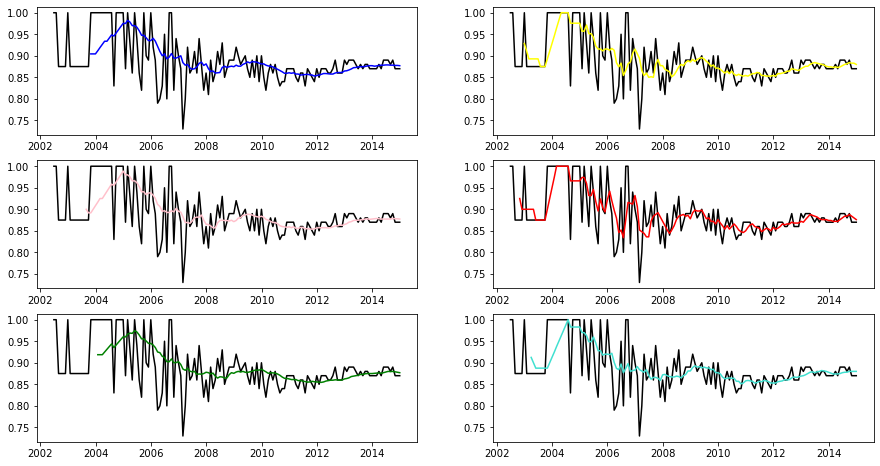

In [19]:
#Vlz of moving average 
fig,axs=plt.subplots(3,2,figsize=(15,8))
axs[0,0].plot(dfs,color="k",label='Actual')
axs[0,0].plot(df_ma.Moving_avg17,color="Blue",label='lage17')

axs[0,1].plot(dfs,color="k",label='Actual')
axs[0,1].plot(df_ma.Moving_avg7,color="Yellow",label='lage7')

axs[1,0].plot(dfs,color="k",label='Actual')
axs[1,0].plot(df_ma.Moving_avg15,color="pink",label='lage15')

axs[1,1].plot(dfs,color="k",label='Actual')
axs[1,1].plot(df_ma.Moving_avg5,color="red",label='lage5')#lage5

axs[2,0].plot(dfs,color="k",label='Actual')
axs[2,0].plot(df_ma.Moving_avg20,color="green",label='lage20')

axs[2,1].plot(dfs,color="k",label='Actual')
axs[2,1].plot(df_ma.Moving_avg10,color="turquoise",label='lage10')
plt.show()

# STATIONARY FINDING:

In [20]:
#User defined function to check stationary
def checkStationarity(data): 
    pvalue = adfuller(data)[1] 
    ''' output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations 
    dfoutput = pd.Series(result[0:4],index=['tstat','pvalue','lags','obs']) 
    pvalue = dfoutput['pvalue'] ''' 
    if(pvalue>0.05): 
        msg = 'p-value={}. Data is not stationary'.format(pvalue) 
    else: 
        msg='p-value={}. Data is stationary'.format(pvalue) 
    return(msg)

In [21]:
#Checking
ret=checkStationarity(dfs);
ret

'p-value=0.2873843539062335. Data is not stationary'

Data is not Stationary . So it should undergo differentiation process.

In [22]:
dfs_diff=pd.DataFrame(dfs-dfs.shift())
dfs_diff.head(2)

,Sentiment
reviewTime,
2002-06-30,NaN
2002-07-31,0.0


In [23]:
dfs_diff=dfs_diff.iloc[1:,:]###Removing the 1st row, which contains null value
dfs_diff.head(2)

,Sentiment
reviewTime,
2002-07-31,0.000
2002-08-31,-0.125


In [32]:
#dfs_diff=dfs

In [24]:
ret=checkStationarity(dfs_diff);
ret

'p-value=0.003665834825792196. Data is stationary'

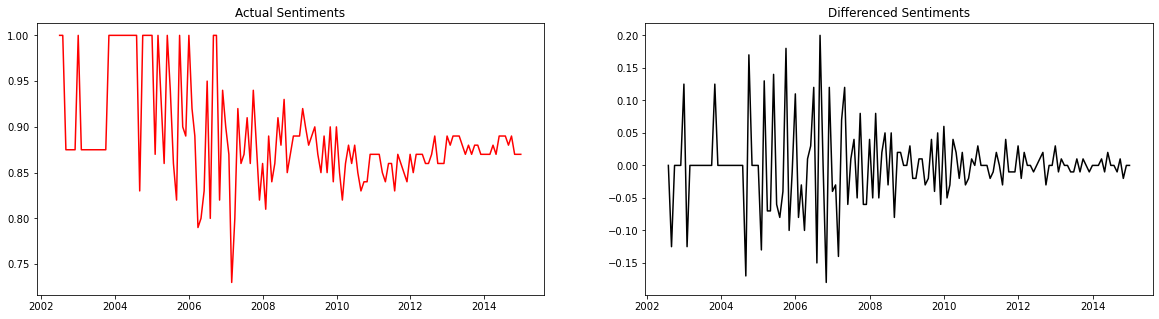

In [25]:
_,_=plt.subplots(figsize=(20,5))
plt.subplot(121)
plt.plot(dfs,color='red')
plt.title('Actual Sentiments')
plt.subplot(122)
plt.plot(dfs_diff,color='k')
plt.title('Differenced Sentiments')
plt.show()

Now the data became stationary and we can further proceed with data analysis.

# Finding the optimum p and q values

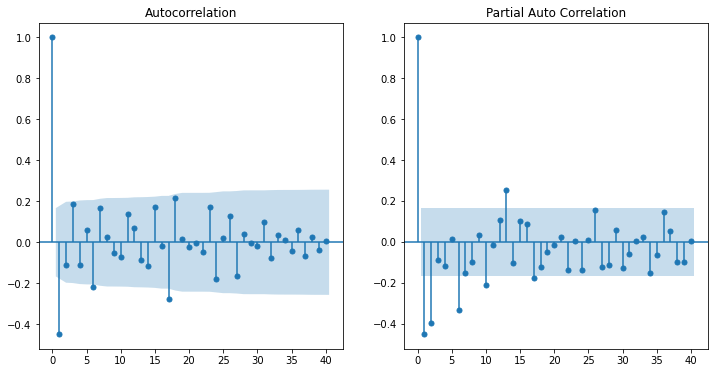

In [26]:
# ACF and PACF plots
ROWS = 1; COLS = 2 
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6)) 
plot_acf(dfs_diff[12:], lags=40, ax=ax[0]); 
plt.title("Auto Correlation") 
plot_pacf(dfs_diff[12:], lags=40, ax=ax[1]); 
plt.title("Partial Auto Correlation") 
plt.show()

# Training and Testing data sets derivation:

In [90]:
# split the data into train and test
# ss = int(0.7 * len(data))
ss = int(0.7 * len(dfs_diff)) 
train = dfs_diff.iloc[:ss] 
test = dfs_diff.iloc[ss:] 
print("train = {}, test = {}".format(len(train), len(test)))

train = 105, test = 45


In [91]:
train = train.squeeze()
test = test.squeeze()
type(train)

pandas.core.series.Series

# ARMA:

In [31]:
p=[1,2,3,4]
q=[1,2,3,4,5,6,7]
for i in p:
    for x in q:
        m1 = ARIMA(train,order=(i,0,x)).fit()#(p,0,q) 
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 153.092
Date:                Sun, 13 Mar 2022   AIC                           -298.183
Time:                        08:42:19   BIC                           -287.568
Sample:                    07-31-2002   HQIC                          -293.882
                         - 03-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.752      0.452      -0.003       0.001
ar.L1          0.1424      0.097      1.466      0.143      -0.048       0.333
ma.L1         -0.8677      0.056    -15.525      0.0

In [57]:
#Model building
m1= ARIMA(train,order=(1,0,2)).fit()#p=1,q=2######Fixing the data

In [62]:
predictions1 = m1.predict(0,len(test)-1) #############Prediction
#print(predictions1)
type(predictions1)

pandas.core.series.Series

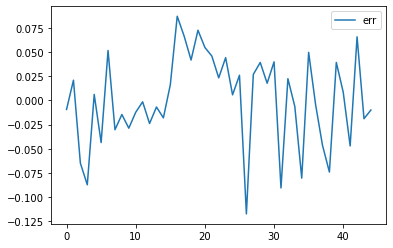

In [63]:
actual =test.tolist()#########storing the mean temp in actual object
preds= [] 
for i in range(len(predictions1)):
    preds.append(predictions1[i]) 
df_re = pd.DataFrame({'actual':actual, 'predicted':preds}) 
df_re['err'] = df_re.actual - df_re.predicted
df_re.err.plot(legend=True)
plt.show()

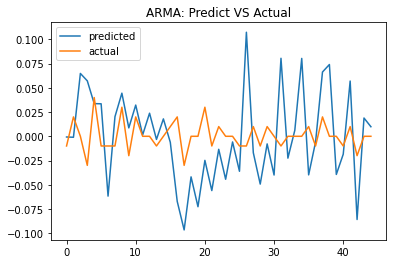

In [64]:
df_re.predicted.plot(legend=True)
df_re.actual.plot(legend=True)
plt.title("ARMA: Predict VS Actual")
plt.show()

From the above graph it is clear that Actual and predicted values are intersecting at some points.

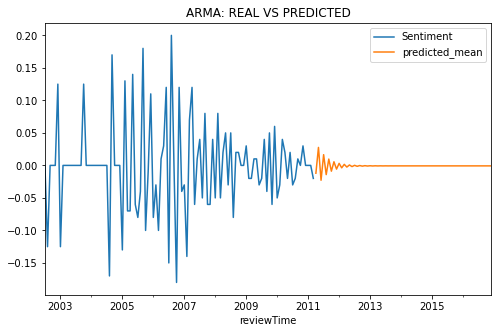

In [66]:
forecast0= m1.forecast(len(test)+24) 
train.plot(figsize=(8,5),legend=True) 
forecast0.plot(legend=True)
plt.title("ARMA: REAL VS PREDICTED")
plt.show()

In [44]:
p=1
q=2
mse1 = mean_squared_error(df_re.actual, df_re.predicted) 
print("\n\tMSE ={}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))


	MSE =0.0015699951034508109
	RMSE = 0.03962316372339305


# ARIMA

Autoregressive Integrated Moving Average (ARIMA) is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

In [36]:
p=[1,2,3]
q=[1,2,3,4,5,6,7]
for i in p:
    for x in q:
        m1 = ARIMA(train,order=(i,1,x)).fit() 
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 137.656
Date:                Sat, 12 Mar 2022   AIC                           -269.312
Time:                        22:42:00   BIC                           -261.379
Sample:                    07-31-2002   HQIC                          -266.098
                         - 03-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4284      0.085     -5.054      0.000      -0.594      -0.262
ma.L1         -0.9999     47.981     -0.021      0.983     -95.040      93.040
sigma2         0.0039      0.189      0.021      0.9

In [67]:
#Model building
m2= ARIMA(train,order=(1,1,3)).fit()#p=1,q=1,d=3######Fixing the data
predictions2 = m2.predict(0,len(test)-1) #############Prediction
#print(predictions2)

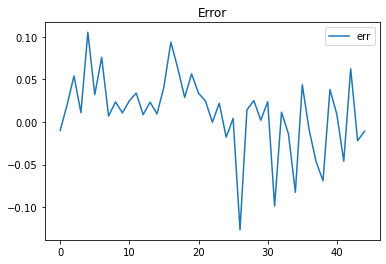

In [68]:
pred=[]
for i in range(len(predictions2)):
    pred.append(predictions2[i]) 
df_res = pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res['err'] = df_res.actual - df_res.predicted

df_res.err.plot(legend=True)
plt.title("Error")
plt.show()

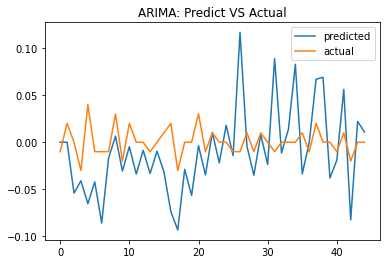

In [69]:
df_res.predicted.plot(legend=True)
df_res.actual.plot(legend=True)
plt.title("ARIMA: Predict VS Actual")
plt.show()

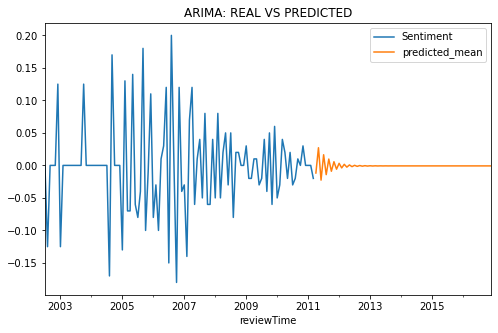

In [70]:
forecast2= m2.forecast(len(test)+24) 
train.plot(figsize=(8,5),legend=True) 
forecast2.plot(legend=True)
plt.title("ARIMA: REAL VS PREDICTED")
plt.show()

In [88]:
p=1
q=3
mse2 = mean_squared_error(df_res.actual, df_res.predicted) 
print("\n\tMSE ={}\n\tRMSE = {}".format(mse2,np.sqrt(mse2)))


	MSE =0.0021545854157869844
	RMSE = 0.04641751195170832


# SARIMA

Introduction: Seasonal Autoregressive Integrated Moving Average (SARIMA) is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
m3= SARIMAX(train, order=(1,1,3), seasonal_order=(1,1,3,5)).fit()#seasonal_order:p,d,q,lage

In [104]:
forecast1= m3.forecast(len(test)+24) 
#forecast1

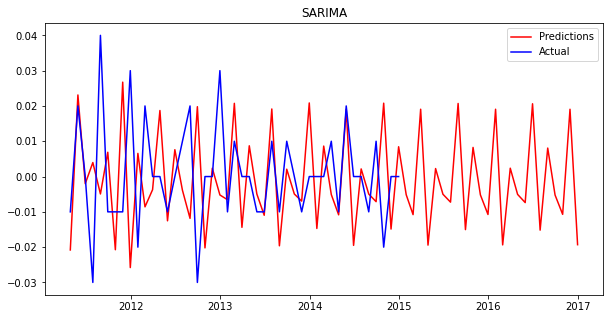

In [105]:
plt.figure(figsize=(10,5)) 
plt.plot(forecast1, 'r', label = 'Predictions') 
plt.plot(test, 'b', label='Actual')
plt.title("SARIMA")
plt.legend() 
plt.show()

From the above graph it is clear that Actual and predicted values are intersecting at some points.

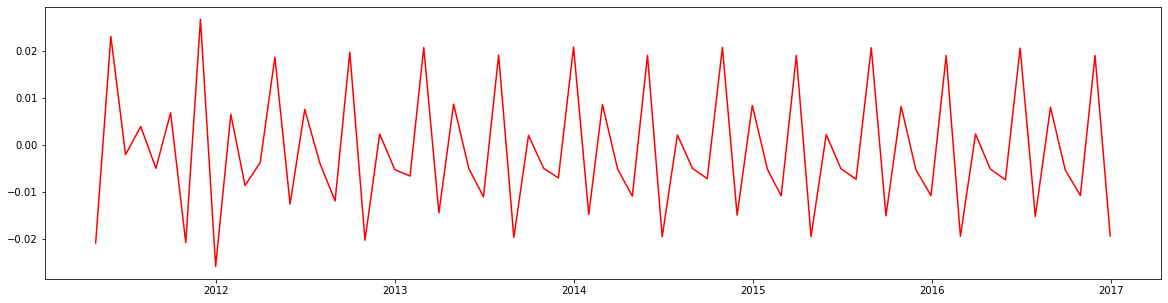

In [106]:
plt.figure(figsize=(20,5)) 
plt.plot(forecast1, 'r', label = 'Predictions')

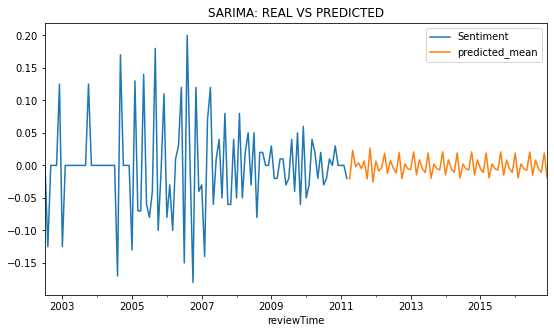

In [107]:
train.plot(figsize=(9,5),legend=True) 
forecast1.plot(legend=True)
plt.title("SARIMA: REAL VS PREDICTED")
plt.show()

In [103]:
mse3=mean_squared_error(test,forecast1) 
print("\n\tMSE ={}\n\tRMSE = {}".format(mse3,np.sqrt(mse3)))


	MSE =0.00043954778460896405
	RMSE = 0.020965394930908505


# SARIMAX

In [112]:
ak=df[['overall','Sentiment','h',"Po"]]
dfk=ak.resample('M').mean().round(2)########Sampling the data based on Months
dfk.dropna()

,overall,Sentiment,h,Po
reviewTime,,,,
2002-06-30,5.00,1.00,41.91,0.20
2002-07-31,5.00,1.00,48.81,0.00
2002-12-31,5.00,1.00,0.00,0.00
2003-10-31,4.00,1.00,49.49,0.80
2003-11-30,5.00,1.00,44.95,0.00
...,...,...,...,...
2014-08-31,4.30,0.88,10.49,0.30
2014-09-30,4.36,0.89,9.80,0.31
2014-10-31,4.25,0.87,9.55,0.28


In [138]:
ss = int(0.7 * len(dfk)) 
train1 = dfk.iloc[:ss] 
test1 = dfk.iloc[ss:] 
print("train1 = {}, test1 = {}".format(len(train1), len(test1)))
train1.dropna()

train1 = 105, test1 = 46


,overall,Sentiment,h,Po
reviewTime,,,,
2002-06-30,5.00,1.00,41.91,0.20
2002-07-31,5.00,1.00,48.81,0.00
2002-12-31,5.00,1.00,0.00,0.00
2003-10-31,4.00,1.00,49.49,0.80
2003-11-30,5.00,1.00,44.95,0.00
...,...,...,...,...
2010-10-31,4.15,0.84,28.78,0.28
2010-11-30,4.20,0.87,30.15,0.31
2010-12-31,4.23,0.87,30.08,0.27


In [139]:
#exog_train = train1
#exog_test =test1
#print(exog_train.head(5))
#print(exog_test.head(5))
#print('exog_train = {}, train = {}'.format( len(exog_train), len(exog_test)))

exog_train = train1[['overall','h',"Po"]] 
exog_test =test1[['overall','h',"Po"]]
print(exog_train.head(5))
print(exog_test.head(5))
print('exog_train = {}, train = {}'.format( len(exog_train), len(train)))
exog_train.isnull().sum()

            overall      h   Po
reviewTime                     
2002-06-30      5.0  41.91  0.2
2002-07-31      5.0  48.81  0.0
2002-08-31      NaN    NaN  NaN
2002-09-30      NaN    NaN  NaN
2002-10-31      NaN    NaN  NaN
            overall      h    Po
reviewTime                      
2011-03-31     4.14  30.75  0.28
2011-04-30     4.14  28.58  0.28
2011-05-31     4.23  28.60  0.27
2011-06-30     4.24  29.03  0.29
2011-07-31     4.13  28.74  0.27
exog_train = 105, train = 105


overall    13
h          13
Po         13
dtype: int64

In [122]:
#Importing
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [135]:
t1=exog_train.dropna()
t1.isnull().sum()

overall    0
h          0
Po         0
dtype: int64

In [136]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Building
m3= SARIMAX(train1.Sentiment, order=(2,1,2), seasonal_order=(2,1,2,7), exog = t1.values).fit()

ValueError: endog and exog matrices are different sizes

In [117]:
#Building
m5= SARIMAX(t1.Sentiment, order=(2,1,2), seasonal_order=(2,1,2,7), exog = t1.values).fit()


AttributeError: 'DataFrame' object has no attribute 'Sentiment'

In [51]:
#Forcasting
fore= m5.forecast(len(test1), exog=exog_test.values) 
fore

92     0.85
93     0.84
94     0.86
95     0.86
96     0.83
97     0.87
98     0.86
99     0.85
100    0.84
101    0.87
102    0.85
103    0.87
104    0.87
105    0.87
106    0.86
107    0.86
108    0.87
109    0.89
110    0.86
111    0.86
112    0.86
113    0.89
114    0.88
115    0.89
116    0.89
117    0.89
118    0.88
119    0.87
120    0.88
121    0.87
122    0.88
123    0.88
124    0.87
125    0.87
126    0.87
127    0.87
128    0.88
129    0.87
130    0.89
131    0.89
132    0.89
133    0.88
134    0.89
135    0.87
136    0.87
137    0.87
Name: predicted_mean, dtype: float64

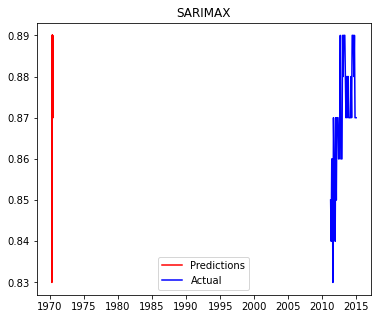

In [52]:
#Graph
plt.figure(figsize=(6,5)) 
plt.plot(fore, 'r', label = 'Predictions')
plt.plot(test1.Sentiment, 'b', label='Actual') 
plt.legend() 
plt.title("SARIMAX")
plt.show()
#plt.plot(fore, 'r', label = 'Predictions')
#plt.show()

Predicted and actual values are overighting .

In [91]:
mse4 = mean_squared_error(test1.Sentiment,fore) 
print("\n\tMSE= {}\n\tRMSE = {}".format(mse4,np.sqrt(mse4)))


	MSE= 4.229680487293983e-24
	RMSE = 2.0566187024565304e-12


Note : This model is not suggested because its overfitting.

# Plotting Predicted VS Actual

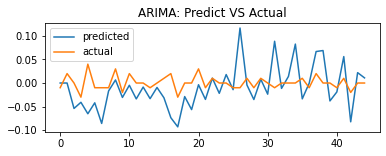

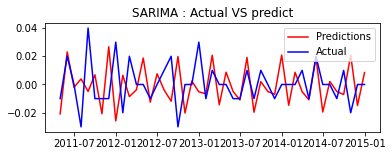

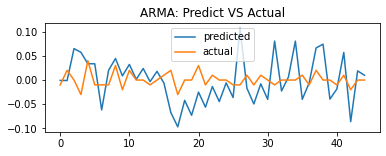

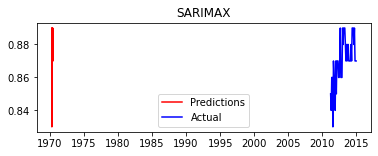

In [92]:
#Plotting Predicted VS Actual
plt.figure(figsize=(6,2))
df_res.predicted.plot(legend=True)
df_res.actual.plot(legend=True)
plt.title("ARIMA: Predict VS Actual")
plt.show()

plt.figure(figsize=(6,2)) 
plt.plot(forecast1, 'r', label = 'Predictions') 
plt.plot(test, 'b', label='Actual')
plt.title("SARIMA : Actual VS predict")
plt.legend() 
plt.show()

plt.figure(figsize=(6,2))
df_re.predicted.plot(legend=True)
df_re.actual.plot(legend=True)
plt.title("ARMA: Predict VS Actual")
plt.show()

plt.figure(figsize=(6,2)) 
plt.plot(fore, 'r', label = 'Predictions')
plt.plot(test1.Sentiment, 'b', label='Actual') 
plt.legend() 
plt.title("SARIMAX")
plt.show()



SARIMA model works better in this data set.

# NLP


In [68]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#! pip install wordcloud
from wordcloud import WordCloud

In [69]:
dfn = pd.read_csv("C:\\Users\\keesi\\Beauty_R2.csv")
#Checking the Data
dfn.head()
#Checking for NaN values
dfn.isna().sum()


Summary       264
overall         0
Sentiment       0
h1              0
h               0
reviewerID      0
asin            0
year            0
month           0
day             0
reviewTime      0
dtype: int64

In [70]:
#Removing NaN Values
dfn.dropna(inplace = True)

In [71]:
dfn.isna().sum()

Summary       0
overall       0
Sentiment     0
h1            0
h             0
reviewerID    0
asin          0
year          0
month         0
day           0
reviewTime    0
dtype: int64

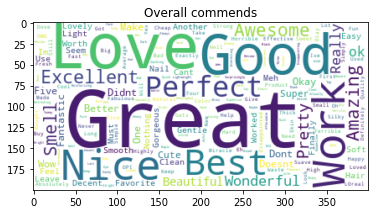

In [72]:
#overall Review
#Creating the text variable
sum1=dfn['Summary']
text = " ".join(cat.split()[0] for cat in dfn['Summary'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Overall commends")
plt.show()

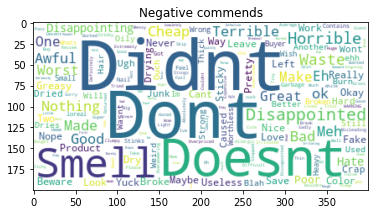

In [73]:
#Negative review
#Creating the text variable
sumn=dfn[dfn['overall']<3]
text2 = " ".join(cat.split()[0] for cat in sumn['Summary'])
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title("Negative commends")
plt.show()

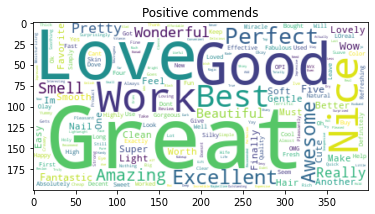

In [74]:
#Positive review
#Creating the text variable
sump=dfn[dfn['overall']>3]
text3 = " ".join(cat.split()[0] for cat in sump['Summary'])
# Creating word_cloud with text as argument in .generate() method
word_cloud3 = WordCloud(collocations = False, background_color = 'white').generate(text3)
# Display the generated Word Cloud
plt.imshow(word_cloud3, interpolation='bilinear')
plt.title("Positive commends")
plt.show()